 RESUME SCREENING

INTRODUCTION:

            Resume Screening is the process of assessing  and shortlisting job applicants based on their resumes. It could 
            be a difficult task for a company to shortlist the resume as when a company posts a job opening they often receive a large number of applications from candidates. It is impossible to check each and every resume received so the company uses the technique resume screening. The main aim of resume screening is to find candidates whose resume is steadily matching the requirement skills and experience to move forward to the hiring process. 

         It can be done efficiently with the use of Machine Learning(ML) as ML uses Artificial Intelligence  and different 
         ML algorithms in order to process these resumes of job applicants in an efficient manner.


    

IMPORTING THE NECESSARY MODULES NEEDEED

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\soora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\soora\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\soora\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

LOADING THE DATASET

In [3]:
data = pd.read_csv("D:\\Project-Resume Screening\\Resume Screening-Dataset.csv")


DATASET INFORMATION

In [4]:
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
data.shape

(962, 2)

In [7]:
unique_categories = data['Category'].unique()
print(unique_categories)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [8]:
category_counts = data['Category'].value_counts()

print(category_counts)

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


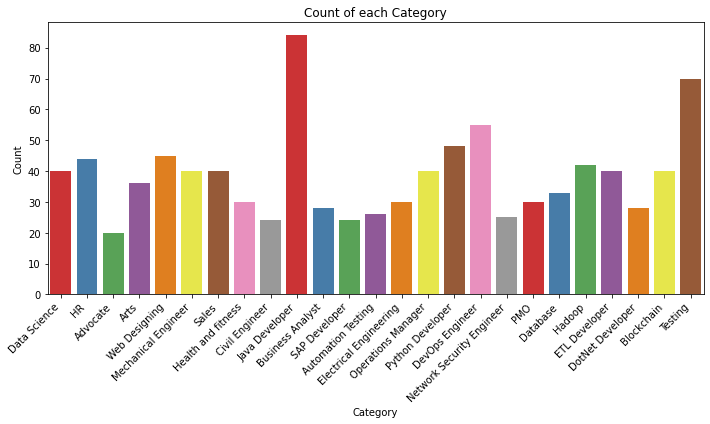

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=data, palette='Set1', order=unique_categories)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of each Category')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

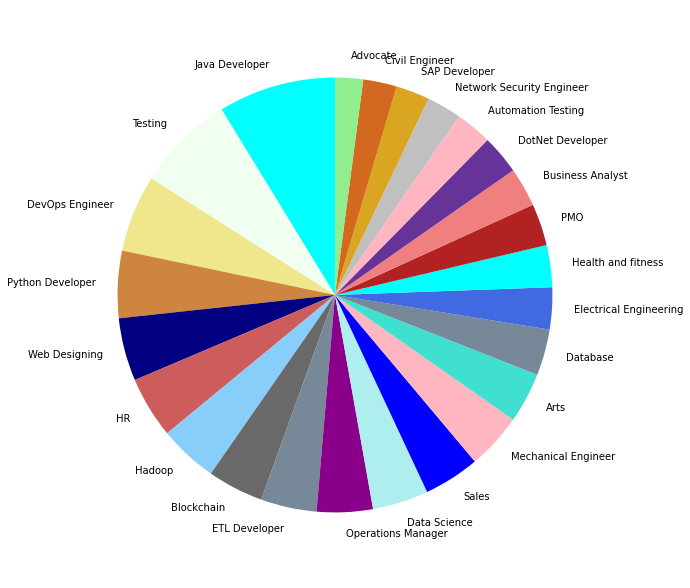

In [10]:
a = data.Category.value_counts()
x = list(a.index)
y = list(a)
fig = plt.figure(figsize=(12, 10))

num_colors = len(x)
custom_colors = np.random.choice(list(plt.cm.colors.CSS4_COLORS.values()), size=num_colors)

plt.pie(y, labels=x, startangle=90, colors=custom_colors)

# Set font color for all text elements to white
plt.title("Distribution of Category", color="white")  # Set title color
plt.xlabel("Category", color="white")  # Set label color (optional)
plt.ylabel("Count", color="white")  # Set label color (optional)

plt.show()

In [11]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [12]:
data.dtypes

Category    object
Resume      object
dtype: object

In [13]:
data.describe

<bound method NDFrame.describe of          Category                                             Resume
0    Data Science  Skills * Programming Languages: Python (pandas...
1    Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2    Data Science  Areas of Interest Deep Learning, Control Syste...
3    Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4    Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
..            ...                                                ...
957       Testing  Computer Skills: â¢ Proficient in MS office (...
958       Testing  â Willingness to accept the challenges. â ...
959       Testing  PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960       Testing  COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961       Testing  Skill Set OS Windows XP/7/8/8.1/10 Database MY...

[962 rows x 2 columns]>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


DATA PREPROCESSING :

resume_text.lower()- used in order to convert all the letters to lower case.

re.sub()-matches all  characters that is not lower or upper case
(maybe a special character) and changes them to space.

tokenize- This method is used to split the text into individual words.

stop_words- These are words like 'in', 'a', 'the', etc, which does not have any significant
meaning , so it can be removed using stop_words.

stemmer- This method is used to convert words to their root form.
(like completed,complete) . Removes prefixes or suffixes.

lemmatizer- This method is also used to bring the words to their root form , 
like better-good. This focuses on the meaning of the word too while stemmer doesn't.

join(words)- used to join those individual words back into a string.


In [15]:
def preprocess_resume(resume_text):
    # Convert to lowercase
    resume_text = resume_text.lower()

    # Remove special characters, digits, and punctuation
    resume_text = re.sub(r"[^a-zA-Z]", " ", resume_text)

    # Tokenize the text
    words = word_tokenize(resume_text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]

    # Perform stemming or lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a string
    preprocessed_text = " ".join(words)

    return preprocessed_text

# Apply preprocessing to the 'Resume' column
data['Resume'] = data['Resume'].apply(preprocess_resume)

print(data['Resume'])

0      skill programming language python panda numpy ...
1      education detail may may b e uit rgpv data sci...
2      area interest deep learning control system des...
3      skill r python sap hana tableau sap hana sql s...
4      education detail mca ymcaust faridabad haryana...
                             ...                        
957    computer skill proficient m office word basic ...
958    willingness accept challenge positive thinking...
959    personal skill quick learner eagerness learn n...
960    computer skill software knowledge m power poin...
961    skill set o window xp database mysql sql serve...
Name: Resume, Length: 962, dtype: object


In [16]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


FINDING THE MOST COMMONLY UDED WORDS IN THE RESUME

In [17]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = data['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText =preprocess_resume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('detail', 498), ('exprience', 446), ('data', 416), ('company', 412), ('month', 398), ('description', 358), ('project', 348), ('skill', 324), ('year', 284), ('january', 216), ('science', 212), ('learning', 210), ('le', 204), ('python', 188), ('c', 182), ('art', 166), ('maharashtra', 166), ('responsibility', 162), ('machine', 160), ('education', 156), ('technology', 152), ('system', 152), ('college', 146), ('university', 140), ('development', 134), ('web', 134), ('application', 128), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('team', 116), ('software', 116), ('time', 110), ('using', 110), ('business', 108), ('b', 106), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('used', 98), ('role', 98), ('experience', 98), ('hr', 98), ('database', 96), ('mumbai', 96), ('knowledge', 94), ('analysis', 92), ('engineering', 90), ('pune', 90)]


In [18]:
# Find the number of words in the mostcommon list
num_words_in_mostcommon = len(mostcommon)
print("Number of words in most common:", num_words_in_mostcommon)

Number of words in most common: 50


WORD THAT HAS THE HIGHEST FREQUENCY

In [19]:
max_word, max_frequency = max(mostcommon, key=lambda x: x[1])

print("Word with Maximum Frequency:", max_word)
print("Maximum Frequency:", max_frequency)

Word with Maximum Frequency: detail
Maximum Frequency: 498


TD-IDF(TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY ):
    This technique is used to convert the text data into numerical vectors which serves as
    an input to the machine learning algorithms.

In [20]:
all_cleaned_resumes = " ".join(data['Resume'])

preprocessed_resumes = data['Resume'].tolist()

tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_resumes)

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


     aaa   ab    abacus  abad  abap  abasaheb  abb  ability  able  abridged  \
0    0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
1    0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
2    0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
3    0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
4    0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
..   ...  ...       ...   ...   ...       ...  ...      ...   ...       ...   
957  0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
958  0.0  0.0  0.184451   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
959  0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.02385   0.0       0.0   
960  0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   
961  0.0  0.0  0.000000   0.0   0.0       0.0  0.0  0.00000   0.0       0.0   

     ...     young  youth   yr  zaggle  zeno  zensa

SPLITTING  THE DATASET INTO TRAIN AND TEST DATA

In [21]:
X = tfidf_df 
y = data['Category']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (769, 5000)
Shape of y_train: (769,)
Shape of X_test: (193, 5000)
Shape of y_test: (193,)


RANDOM FOREST CLASSIFIER

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

precision_scores = precision_score(y_test, y_pred, average=None)
recall_scores = recall_score(y_test, y_pred, average=None)
f1_scores = f1_score(y_test, y_pred, average=None)

for category, precision, recall, f1 in zip(rf_classifier.classes_, precision_scores, recall_scores, f1_scores):
    print(f"Category: {category}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print()

print("Classification Report:")
print(classification_report(y_test, y_pred))


Overall Accuracy: 0.9896373056994818
Category: Advocate
Precision: 1.00
Recall: 0.33
F1-Score: 0.50

Category: Arts
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Automation Testing
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Blockchain
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Business Analyst
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Civil Engineer
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Data Science
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Database
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: DevOps Engineer
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: DotNet Developer
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: ETL Developer
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Electrical Engineering
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: HR
Precision: 0.86
Recall: 1.00
F1-Score: 0.92

Category: Hadoop
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Category: Healt

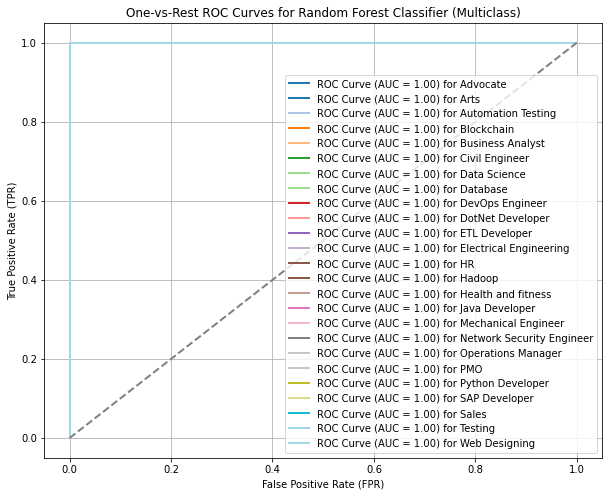

In [23]:
y_test_bin_rf = label_binarize(y_test, classes=rf_classifier.classes_)

y_prob_rf = rf_classifier.predict_proba(X_test)

n_classes_rf = len(rf_classifier.classes_)
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes_rf):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin_rf[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = roc_auc_score(y_test_bin_rf[:, i], y_prob_rf[:, i])

plt.figure(figsize=(10, 8))
colors_rf = cycle(plt.cm.tab20(np.linspace(0, 1, n_classes_rf)))  # Use 'tab20' colormap for 25 different colors
for i, color in zip(range(n_classes_rf), colors_rf):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc_rf[i]:.2f}) for {rf_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves for Random Forest Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



SUPPORT VECTOR MACHINE

In [24]:
svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Overall Accuracy (SVM):", accuracy_svm)

precision_scores_svm = precision_score(y_test, y_pred_svm, average=None)
recall_scores_svm = recall_score(y_test, y_pred_svm, average=None)
f1_scores_svm = f1_score(y_test, y_pred_svm, average=None)

for category, precision, recall, f1 in zip(svm_classifier.classes_, precision_scores_svm, recall_scores_svm, f1_scores_svm):
    print(f"Category: {category}")
    print(f"Precision (SVM): {precision:.2f}")
    print(f"Recall (SVM): {recall:.2f}")
    print(f"F1-Score (SVM): {f1:.2f}")
    print()

print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


Overall Accuracy (SVM): 0.9948186528497409
Category: Advocate
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Arts
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Automation Testing
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Blockchain
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Business Analyst
Precision (SVM): 0.80
Recall (SVM): 1.00
F1-Score (SVM): 0.89

Category: Civil Engineer
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Data Science
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: Database
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: DevOps Engineer
Precision (SVM): 1.00
Recall (SVM): 0.93
F1-Score (SVM): 0.96

Category: DotNet Developer
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category: ETL Developer
Precision (SVM): 1.00
Recall (SVM): 1.00
F1-Score (SVM): 1.00

Category:

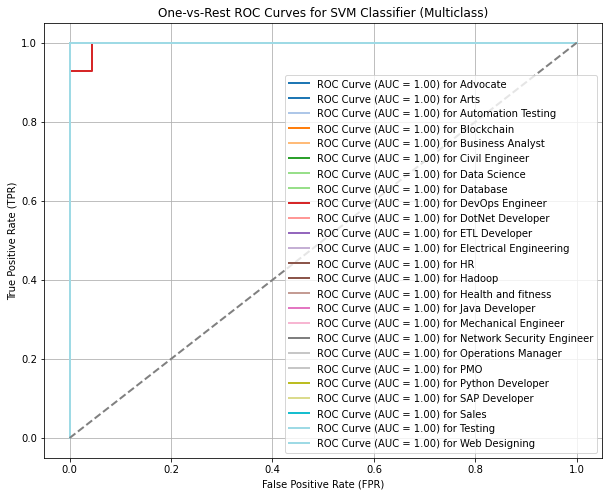

In [25]:
y_test_bin_svm = label_binarize(y_test, classes=svm_classifier.classes_)

y_scores_svm = svm_classifier.decision_function(X_test)

n_classes_svm = len(svm_classifier.classes_)
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()
for i in range(n_classes_svm):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test_bin_svm[:, i], y_scores_svm[:, i])
    roc_auc_svm[i] = roc_auc_score(y_test_bin_svm[:, i], y_scores_svm[:, i])

plt.figure(figsize=(10, 8))
colors_svm = cycle(plt.cm.tab20(np.linspace(0, 1, n_classes_svm)))  # Use 'tab20' colormap for 25 different colors
for i, color in zip(range(n_classes_svm), colors_svm):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc_svm[i]:.2f}) for {svm_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves for SVM Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


NAIVE BAYES 

In [26]:
nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)

y_pred_nb = nb_classifier.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Overall Accuracy (Naive Bayes):", accuracy_nb)

precision_scores_nb = precision_score(y_test, y_pred_nb, average=None)
recall_scores_nb = recall_score(y_test, y_pred_nb, average=None)
f1_scores_nb = f1_score(y_test, y_pred_nb, average=None)

for category, precision, recall, f1 in zip(nb_classifier.classes_, precision_scores_nb, recall_scores_nb, f1_scores_nb):
    print(f"Category: {category}")
    print(f"Precision (Naive Bayes): {precision:.2f}")
    print(f"Recall (Naive Bayes): {recall:.2f}")
    print(f"F1-Score (Naive Bayes): {f1:.2f}")
    print()

print("Classification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Overall Accuracy (Naive Bayes): 0.9896373056994818
Category: Advocate
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Arts
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Automation Testing
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Blockchain
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Business Analyst
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Civil Engineer
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Data Science
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: Database
Precision (Naive Bayes): 1.00
Recall (Naive Bayes): 1.00
F1-Score (Naive Bayes): 1.00

Category: DevOps Engineer
Precision (Naive Bayes): 1.00
Recall (Naive Bayes

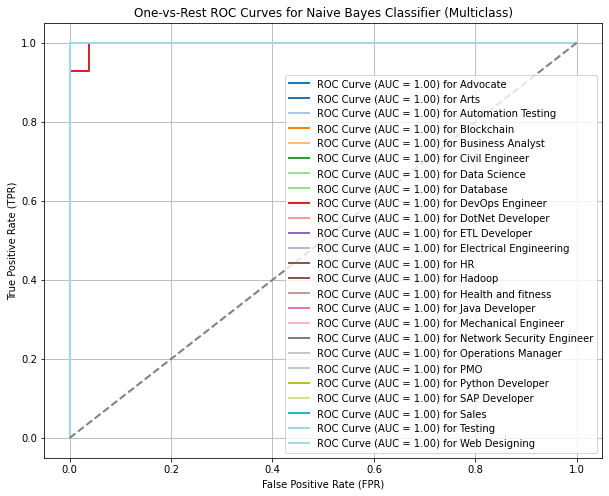

In [27]:
y_test_bin_nb = label_binarize(y_test, classes=nb_classifier.classes_)

y_prob_nb = nb_classifier.predict_proba(X_test)

n_classes_nb = len(nb_classifier.classes_)
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()
for i in range(n_classes_nb):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin_nb[:, i], y_prob_nb[:, i])
    roc_auc_nb[i] = roc_auc_score(y_test_bin_nb[:, i], y_prob_nb[:, i])

plt.figure(figsize=(10, 8))
colors_nb = cycle(plt.cm.tab20(np.linspace(0, 1, n_classes_nb)))  # Use 'tab20' colormap for 25 different colors
for i, color in zip(range(n_classes_nb), colors_nb):
    plt.plot(fpr_nb[i], tpr_nb[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc_nb[i]:.2f}) for {nb_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves for Naive Bayes Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


LOGISTIC REGRESSION

In [28]:
lr_classifier = LogisticRegression()

lr_classifier.fit(X_train, y_train)

y_pred_lr = lr_classifier.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Overall Accuracy (Logistic Regression):", accuracy_lr)

precision_scores_lr = precision_score(y_test, y_pred_lr, average=None)
recall_scores_lr = recall_score(y_test, y_pred_lr, average=None)
f1_scores_lr = f1_score(y_test, y_pred_lr, average=None)

for category, precision, recall, f1 in zip(lr_classifier.classes_, precision_scores_lr, recall_scores_lr, f1_scores_lr):
    print(f"Category: {category}")
    print(f"Precision (Logistic Regression): {precision:.2f}")
    print(f"Recall (Logistic Regression): {recall:.2f}")
    print(f"F1-Score (Logistic Regression): {f1:.2f}")
    print()

print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Overall Accuracy (Logistic Regression): 0.9948186528497409
Category: Advocate
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Arts
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Automation Testing
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Blockchain
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Business Analyst
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Civil Engineer
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Category: Data Science
Precision (Logistic Regression): 1.00
Recall (Logistic Regression): 1.00
F1-Score (Logistic Regression): 1.00

Categ

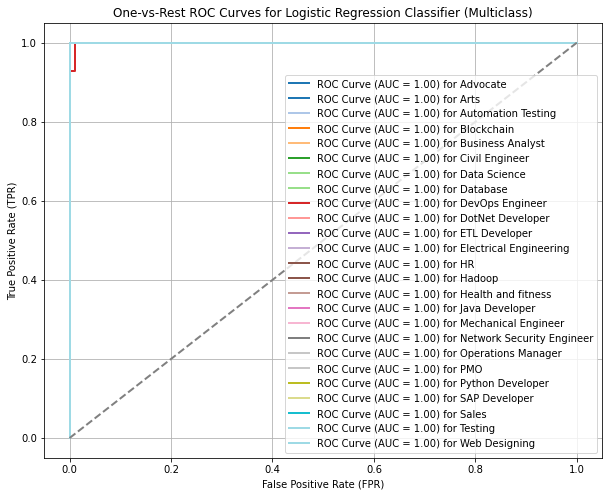

In [29]:
y_test_bin_lr = label_binarize(y_test, classes=lr_classifier.classes_)

y_prob_lr = lr_classifier.predict_proba(X_test)

n_classes_lr = len(lr_classifier.classes_)
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes_lr):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin_lr[:, i], y_prob_lr[:, i])
    roc_auc_lr[i] = roc_auc_score(y_test_bin_lr[:, i], y_prob_lr[:, i])

plt.figure(figsize=(10, 8))
colors_lr = cycle(plt.cm.tab20(np.linspace(0, 1, n_classes_lr)))  # Use 'tab20' colormap for 25 different colors
for i, color in zip(range(n_classes_lr), colors_lr):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc_lr[i]:.2f}) for {lr_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves for Logistic Regression Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


K NEAREST NEIGHBOURS

In [30]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Overall Accuracy (k-Nearest Neighbors):", accuracy_knn)

precision_scores_knn = precision_score(y_test, y_pred_knn, average=None)
recall_scores_knn = recall_score(y_test, y_pred_knn, average=None)
f1_scores_knn = f1_score(y_test, y_pred_knn, average=None)

for category, precision, recall, f1 in zip(knn_classifier.classes_, precision_scores_knn, recall_scores_knn, f1_scores_knn):
    print(f"Category: {category}")
    print(f"Precision (k-Nearest Neighbors): {precision:.2f}")
    print(f"Recall (k-Nearest Neighbors): {recall:.2f}")
    print(f"F1-Score (k-Nearest Neighbors): {f1:.2f}")
    print()

print("Classification Report (k-Nearest Neighbors):")
print(classification_report(y_test, y_pred_knn))


Overall Accuracy (k-Nearest Neighbors): 0.9844559585492227
Category: Advocate
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Arts
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Automation Testing
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Blockchain
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Business Analyst
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Civil Engineer
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 1.00
F1-Score (k-Nearest Neighbors): 1.00

Category: Data Science
Precision (k-Nearest Neighbors): 1.00
Recall (k-Nearest Neighbors): 0.60
F1-Score (k-Nearest Neighbors): 0.75

Categ

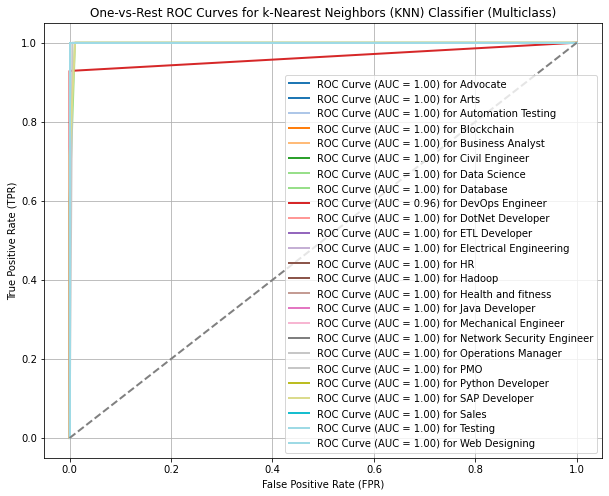

In [31]:
y_test_bin_knn = label_binarize(y_test, classes=knn_classifier.classes_)

y_prob_knn = knn_classifier.predict_proba(X_test)

n_classes_knn = len(knn_classifier.classes_)
fpr_knn = dict()
tpr_knn = dict()
roc_auc_knn = dict()
for i in range(n_classes_knn):
    fpr_knn[i], tpr_knn[i], _ = roc_curve(y_test_bin_knn[:, i], y_prob_knn[:, i])
    roc_auc_knn[i] = roc_auc_score(y_test_bin_knn[:, i], y_prob_knn[:, i])

plt.figure(figsize=(10, 8))
colors_knn = cycle(plt.cm.tab20(np.linspace(0, 1, n_classes_knn)))  # Use 'tab20' colormap for 25 different colors
for i, color in zip(range(n_classes_knn), colors_knn):
    plt.plot(fpr_knn[i], tpr_knn[i], color=color, lw=2, label=f'ROC Curve (AUC = {roc_auc_knn[i]:.2f}) for {knn_classifier.classes_[i]}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves for k-Nearest Neighbors (KNN) Classifier (Multiclass)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


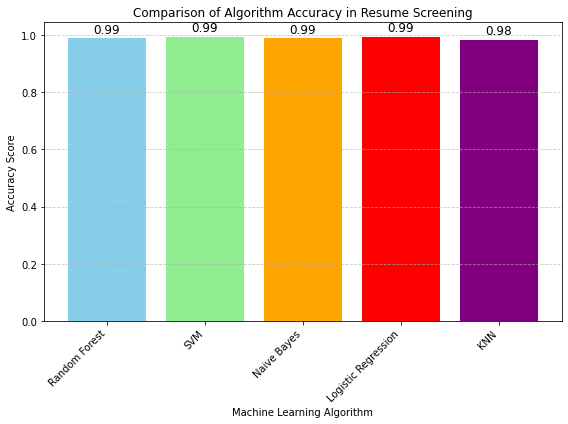

In [32]:
import matplotlib.pyplot as plt


algorithms = ["Random Forest", "SVM", "Naive Bayes", "Logistic Regression", "KNN"]

accuracies = [0.9896373056994818,  0.9948186528497409, 0.9896373056994818, 0.9948186528497409,0.9844559585492227]  

plt.figure(figsize=(8, 6))
plt.bar(algorithms, accuracies, color=['skyblue', 'lightgreen', 'orange', 'red', 'purple'])
plt.xlabel("Machine Learning Algorithm")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Algorithm Accuracy in Resume Screening")


for i, v in enumerate(accuracies):
    plt.text(i, v + 0.008, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the chart
plt.show()
